The goal of this project is to develop a machine learning model for predicting customer churn in a telco company. Customer churn refers to the phenomenon where customers terminate their relationship with a company and switch to a competitor or discontinue using the service altogether. By analyzing various customer attributes and service usage patterns, we aim to create a classification model that can accurately predict whether a customer is likely to churn or not.

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest  #for fearure selection
from sklearn.feature_selection import mutual_info_classif     #for fearure selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.neural_network import MLPClassifier



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset used for this project is a sample dataset of Telco Customer Churn, inspired by the original dataset "Telco customer churn (11.1.3+)" from IBM Business Analytics Community. It has been cleaned and aggregated for the purpose of telco customer churn analysis and prediction. The dataset is obtained from Kaggle.com.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data_luminar/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

The objective of this project is to build a classification model that can predict customer churn based on the given set of features. By analyzing the historical data and customer behavior patterns, the model will learn to identify the factors that contribute to churn and make accurate predictions for new customers. The ultimate aim is to assist the telco company in taking proactive measures to retain customers and improve customer satisfaction.

------------Visualizing the class Imbalance----------
Axes(0.125,0.11;0.775x0.77)


No     5174
Yes    1869
Name: Churn, dtype: int64

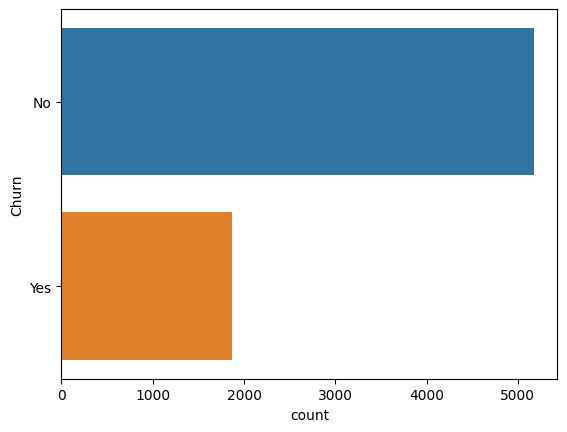

In [ ]:
print("------------Visualizing the class Imbalance----------")
y=df["Churn"]
print(sns.countplot(data=df,y="Churn"))
df["Churn"].value_counts()

In [ ]:
print(df.isna().sum())
df.dtypes

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data Preprocessing: Perform data cleaning, handle missing values, and preprocess the categorical and numerical features as required.

In [ ]:
df=df.drop(["customerID"],axis=1)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:

le=LabelEncoder()
lst=["gender","Partner","OnlineSecurity","MonthlyCharges",
"Dependents",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"Contract",
"PaperlessBilling","PaymentMethod","TotalCharges","Churn"]
for i in lst:
  df[i]=le.fit_transform(df[i])
df.dtypes

gender              int64
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.002306,0.119886,0.118577,0.005275,0.184681,0.186907,0.107114,0.163530,-0.171026,0.508131,0.135300,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.002306,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.119886,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.090756,-0.195525


Exploratory Data Analysis: Analyze the dataset to gain insights into the distribution of features and their relationship with churn.

----------finds potential relationships between variables and to understand the strength of these relationships.-----------


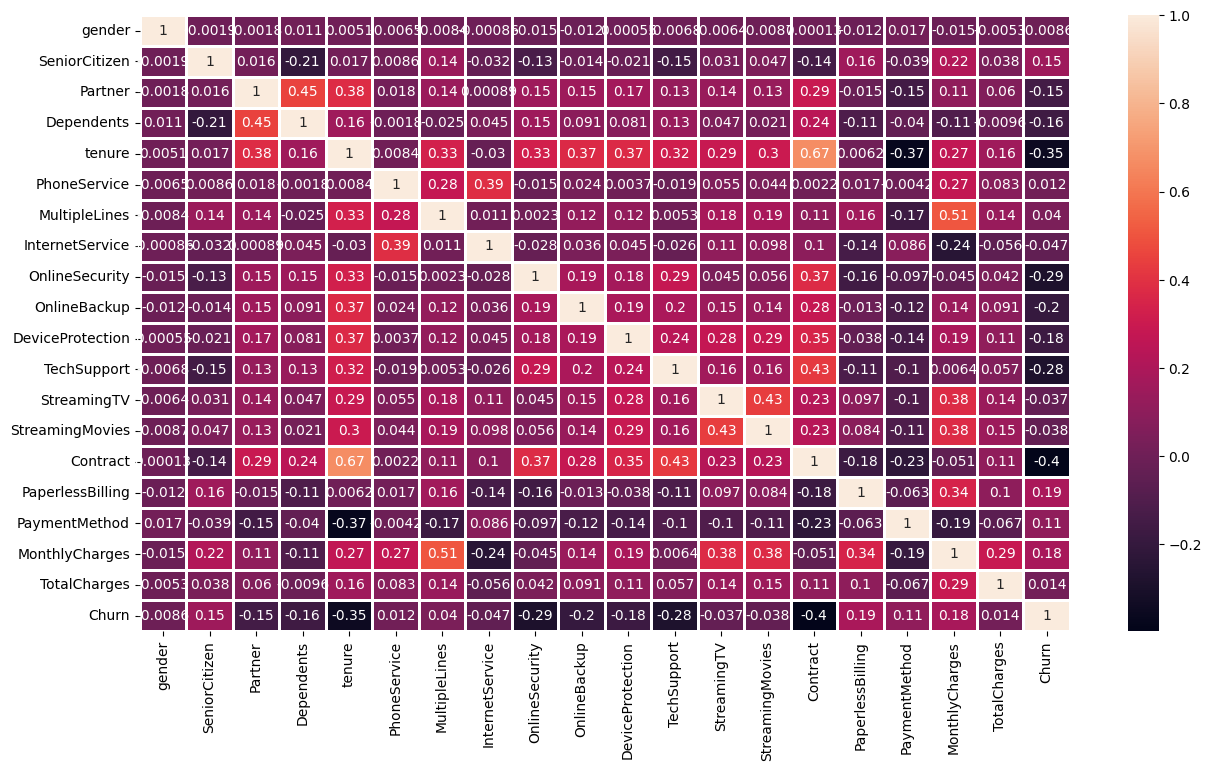

In [ ]:
import warnings
print("----------finds potential relationships between variables and to understand the strength of these relationships.-----------")
plt.figure(figsize=[15,8])
warnings.filterwarnings("ignore")
plt.show(sns.heatmap(df.corr(),annot=True,linewidth=1))

In [ ]:
df=df.drop(["gender"],axis=1)

In [ ]:
df.dtypes

SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService     int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract            int64
PaperlessBilling    int64
PaymentMethod       int64
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [ ]:

#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=341,test_size=0.3)
print(X_train.shape[0]," rows is present in X_train")

4930  rows is present in X_train


In [ ]:
 # #feature selection
# bestfeatures=SelectKBest(score_func=mutual_info_classif,k=19)
# print("------------feature selection using the Information Gain method----------")
# scores = mutual_info_classif(X_train, y_train)
# # Create a list of feature names
# num_features = X_train.shape[1]
# feature_names = []
# for i in range(num_features):
#     feature_names.append(f'Feature_{i}')

# df_scores = pd.DataFrame({'Feature':feature_names , 'Score': scores})
# df_scores = df_scores.sort_values('Score', ascending=False)
# print(df_scores)
# print("-----------")
# num_columns = X.shape[1]
# column_names = [f'Feature_{i}' for i in range(num_columns)]
# column_name = X.columns[4]
# print(column_name)

#------------feature selection using the Information Gain method----------
       Feature     Score
14  Feature_14  0.097724
4    Feature_4  0.071392
8    Feature_8  0.067328
11  Feature_11  0.057248
7    Feature_7  0.053660
16  Feature_16  0.048679
10  Feature_10  0.041474
17  Feature_17  0.039832
9    Feature_9  0.035735
12  Feature_12  0.032219
13  Feature_13  0.028845
15  Feature_15  0.023087
18  Feature_18  0.022439
3    Feature_3  0.015919
2    Feature_2  0.012065
6    Feature_6  0.011901
1    Feature_1  0.001936
0    Feature_0  0.001458
5    Feature_5  0.000346Looking at the provided feature scores,("gender") "Feature_0" has the lowest score of 0.002307. To potentially improve accuracy i consider to remove this particular column. even after removing features with low score accuracy is not improving so i droped this process

In [ ]:

#Scaling
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Hyperparameter Tuning: Fine-tune the model's hyperparameters using techniques like grid search or random search to optimize its performance.

In [ ]:
##HYPER PARAMETER TUNING
# from sklearn import feature_selection
# import warnings
# from sklearn.model_selection import GridSearchCV
# import warnings
# lgb_classifier=MLPClassifier()
# grid_vls={'hidden_layer_sizes': [(100,), (50, 50), (50, 25), (25, 25)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['sgd', 'adam'],
#     'learning_rate': ['constant', 'adaptive']
#      }
# grid=GridSearchCV(estimator=lgb_classifier, param_grid=grid_vls,scoring="accuracy", cv=5,refit=True,return_train_score=True)
# grid.fit(X_train, y_train)
# grid.best_params_

Model Selection and Training: Experiment with various classification algorithms such as logistic regression, decision trees, random forests, or gradient boosting, and train the model using appropriate evaluation metrics.

**normal** **method**

******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1576
           1       0.66      0.55      0.60       537

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113

AdaBoostClassifier() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7bdb86a606a0>
Accuracy: 0.8140085186938003
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1576
           1       0.61      0.48      0.5

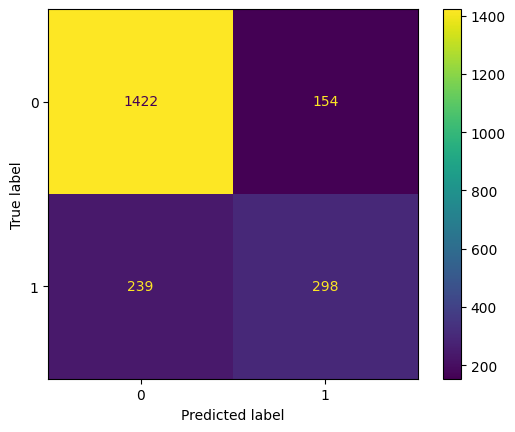

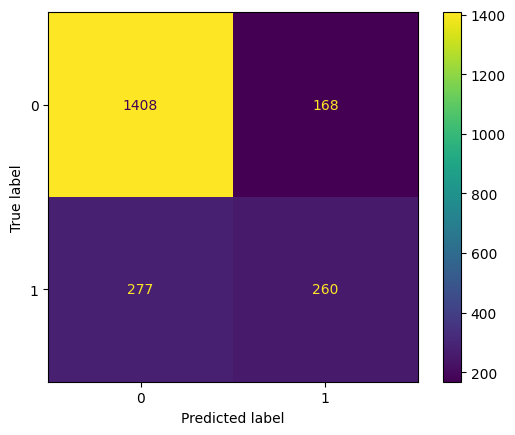

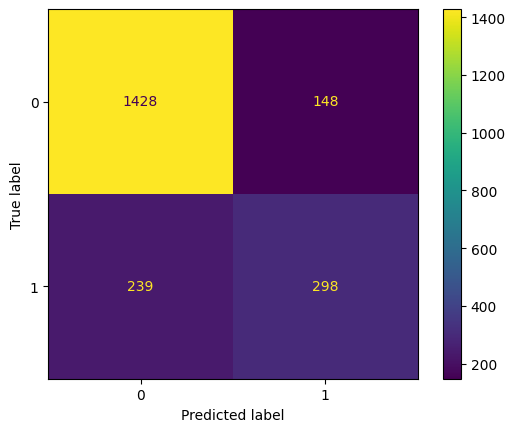

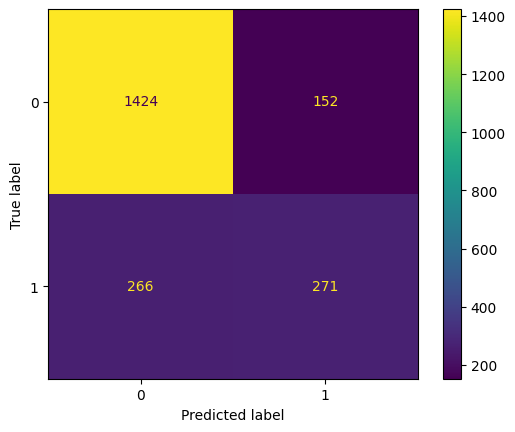

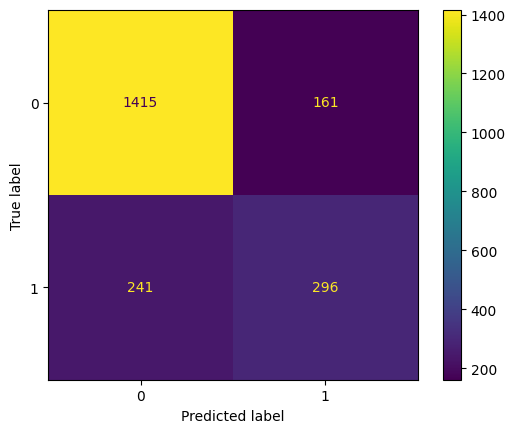

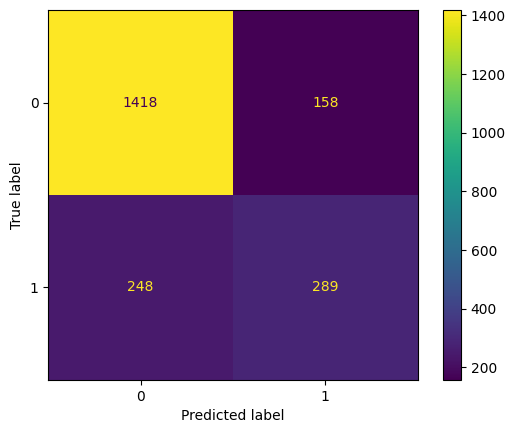

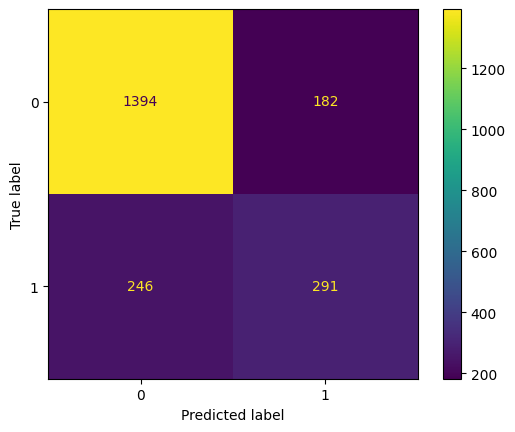

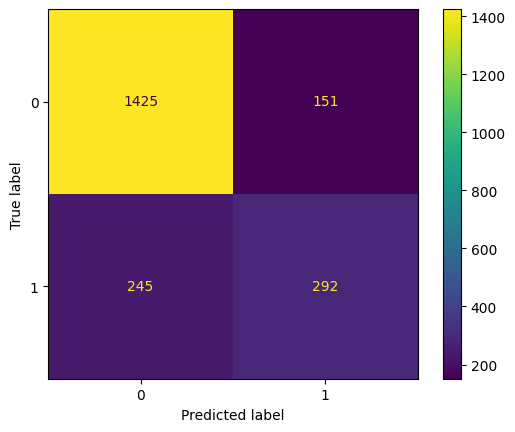

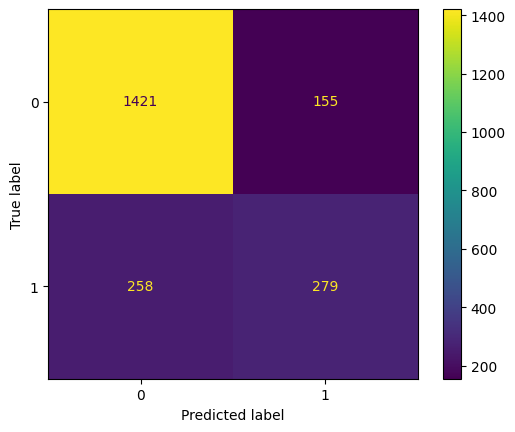

In [ ]:

#To execute machine learning models in a more efficient and organized manner,
#a recommended approach involves utilizing a for loop to iteratively run the models.

rf=RandomForestClassifier()
ad=AdaBoostClassifier()
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lg=lgb.LGBMClassifier(learning_rate= 0.1,n_estimators=50,num_leaves=20)
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
svc=SVC(C=0.1,gamma=0.01,kernel='linear',random_state=2)
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
lst1=[ad,dt,gb,rf,lr,svc,xgb,lg,nn]
ac=[]
model=[]
for i in lst1:
  print('*'*20,i,'*'*20)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

  print(i,ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)
  print("Accuracy:", accuracy)
  print("_"*200)
  ac.append(accuracy)
  model.append(i)



DECISION TREE

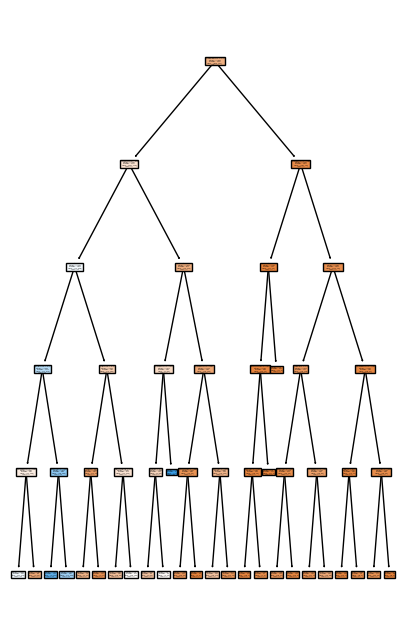

In [ ]:
#DECISION TREE
plt.figure(figsize=(5,8))
plt.title("Customer_Churn_Decision_Tree")
plt.show(tree.plot_tree(dt,filled=True,
feature_names=["gender",
"SeniorCitizen",
"Partner",
"Dependents",
"tenure",
"PhoneService",
"MultipleLines",
"InternetService",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"Contract",
"PaperlessBilling",
"PaymentMethod",
"MonthlyCharges",
"TotalCharges",
"Churn"],
class_names=["no","yes"]
))


 **Principal** **Component** **Analysis**

In [ ]:
pca=PCA(n_components=3,random_state=3)
X_trainm=pca.fit_transform(X_train)
X_testm=pca.transform(X_test)
pca.explained_variance_ratio_
print(X_trainm.shape)
print(X_testm.shape)

(4930, 3)
(2113, 3)


******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1576
           1       0.61      0.32      0.42       537

    accuracy                           0.77      2113
   macro avg       0.70      0.62      0.64      2113
weighted avg       0.75      0.77      0.75      2113

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7bdb86afffd0>
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** GradientBoostingClassifier() ********************
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1576
       

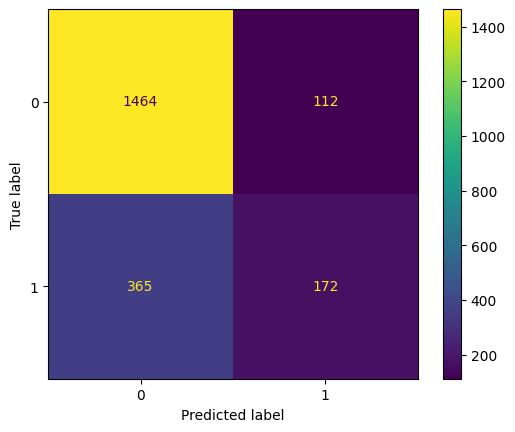

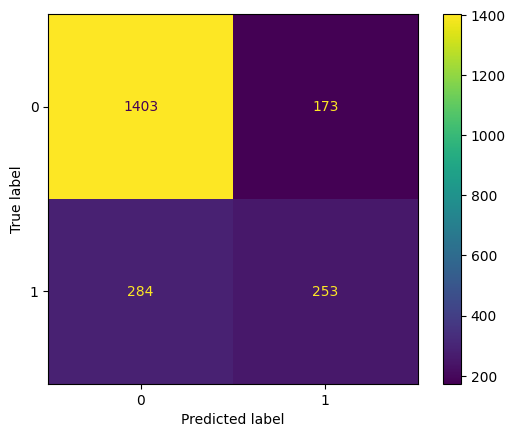

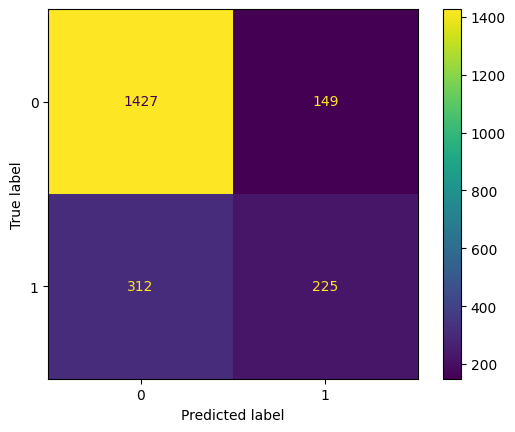

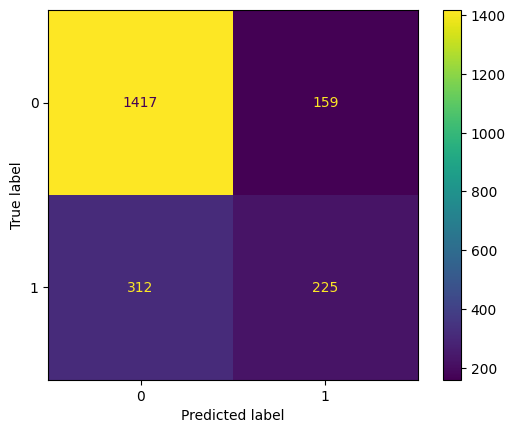

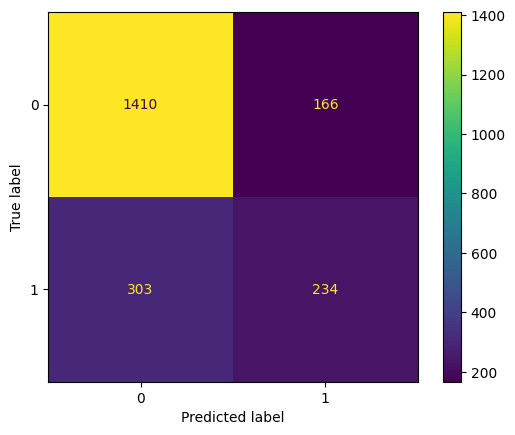

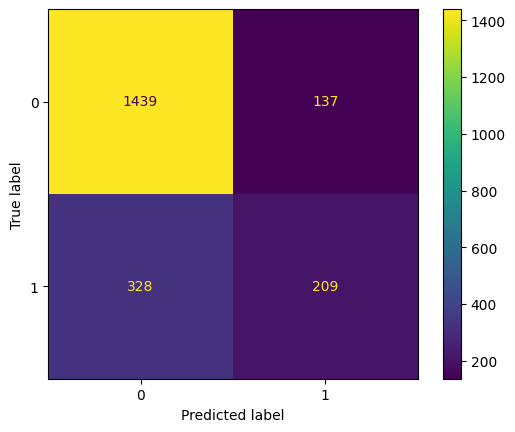

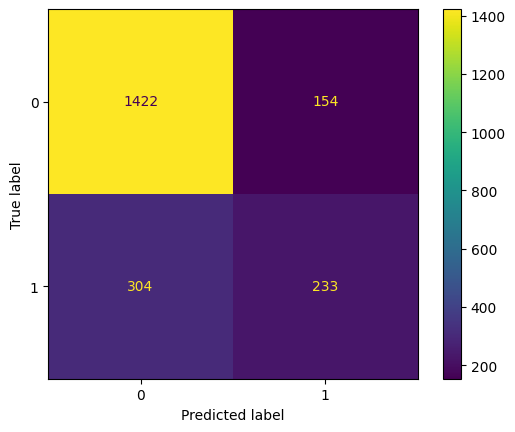

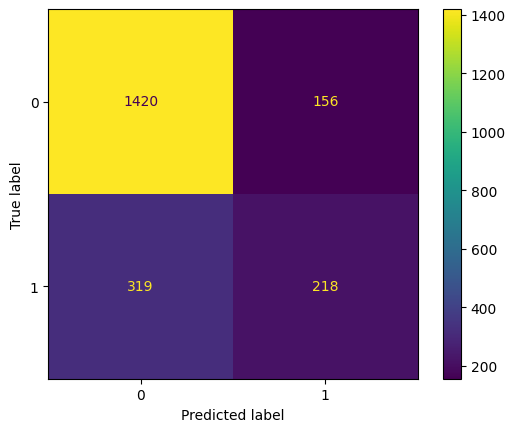

In [ ]:

rf=RandomForestClassifier(n_estimators=500,n_jobs=-1,max_depth=9,oob_score=True,random_state=25,max_samples=0.25,min_samples_leaf=3)
ad=AdaBoostClassifier()
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lg=lgb.LGBMClassifier(learning_rate= 0.1,n_estimators=50,num_leaves=20)
lr=LogisticRegression(C=0.5,class_weight=None,dual=False,fit_intercept=True,max_iter=100,solver="saga",random_state=15,penalty="l2")
gb=GradientBoostingClassifier()
xgb=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=150)
svc=SVC(C=0.1,gamma=0.01,kernel='linear',random_state=2)
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
lst1=[dt,gb,rf,lr,svc,xgb,lg,nn]
acp=[]
modelp=[]
for p in lst1:
  print('*'*20,p,'*'*20)
  p.fit(X_trainm,y_train)
  y_pred=p.predict(X_testm)

  print(classification_report(y_test,y_pred))
  print(p,ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)
  print("_"*200)
  acp.append(accuracy)
  modelp.append(p)


# **SMOTE** **SAMPLING**

In [ ]:
sm=SMOTE(random_state=589)
X_train_o, y_train_o=sm.fit_resample(X_train,y_train)
#Finding best random state.
import random

random_numbers = random.sample(range(801,900),25)

best_random_state=None
best_accuracy=0.0
for value in random_numbers:
  X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=value)
  sm=SMOTE()
  X_train, y_train=sm.fit_resample(X_train,y_train)
  for clf in lst1:
      clf.fit(X_train,y_train)
      accuracy=clf.score(X_test,y_test)
  if accuracy>0.80028395646000:   #best_accuracy   #589
      best_accuracy=accuracy
      best_random_state=value
      print("Best Random State:", best_random_state)
      print("Best Accuracy:", best_accuracy)

In [ ]:
##feature selection
# from sklearn import feature_selection
# import warnings
# from sklearn.model_selection import GridSearchCV
# import warnings
# rf = XGBClassifier()
# grid_vls={'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
#      }
# grid=GridSearchCV(estimator=rf, param_grid=grid_vls,scoring="accuracy", cv=5,refit=True,return_train_score=True)
# grid.fit(X_train_o, y_train_o)
# grid.best_params_

******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1576
           1       0.55      0.76      0.64       537

    accuracy                           0.78      2113
   macro avg       0.73      0.78      0.74      2113
weighted avg       0.82      0.78      0.79      2113

AdaBoostClassifier() <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7bdb80a92e90>
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1576
           1       0.51      0.76      0.61       537

    accuracy    

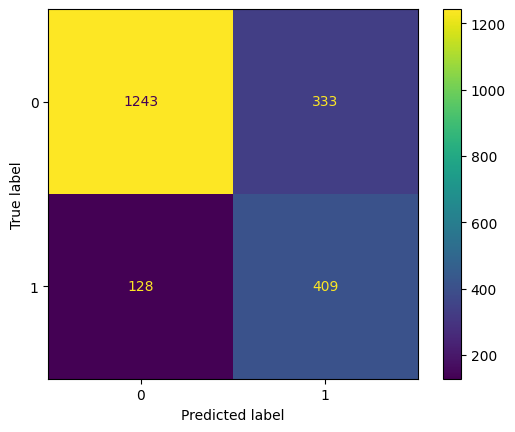

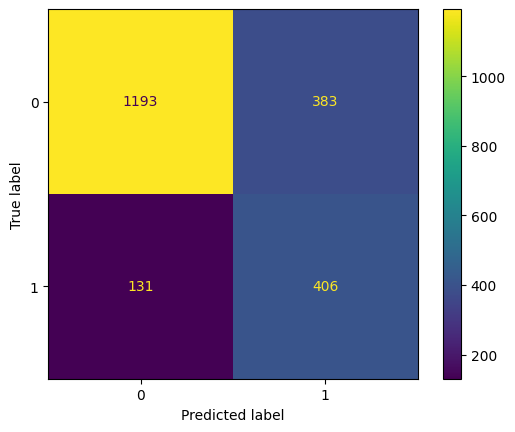

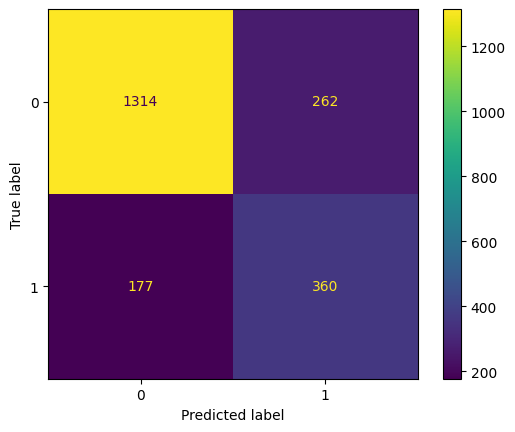

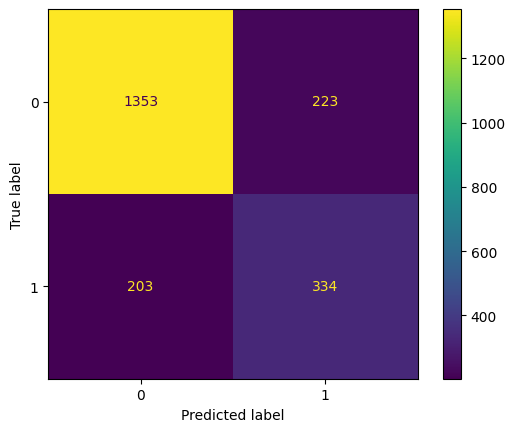

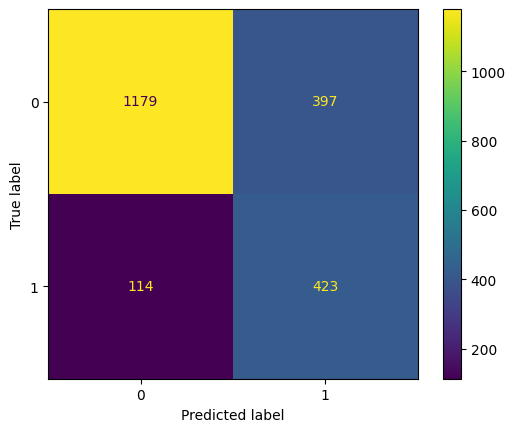

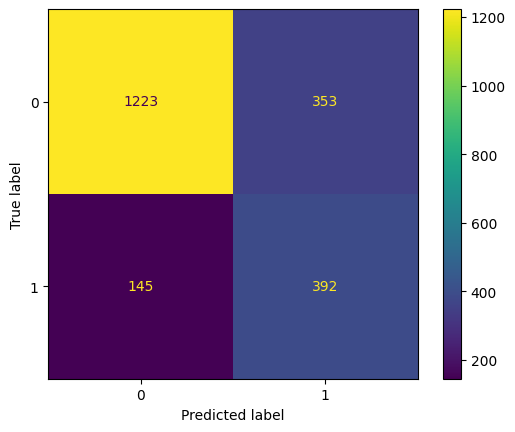

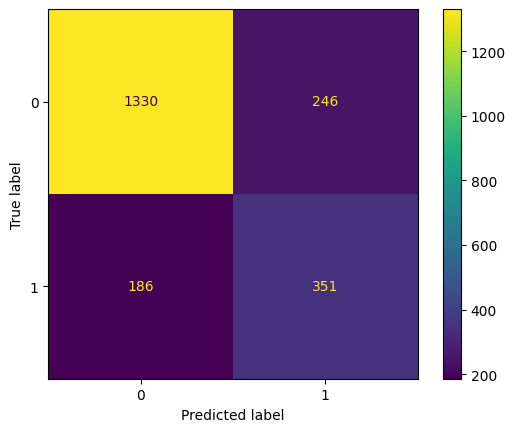

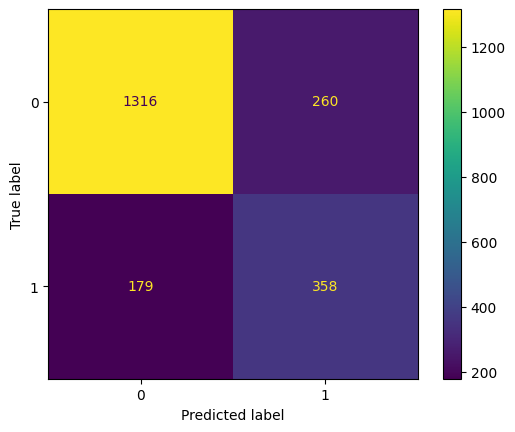

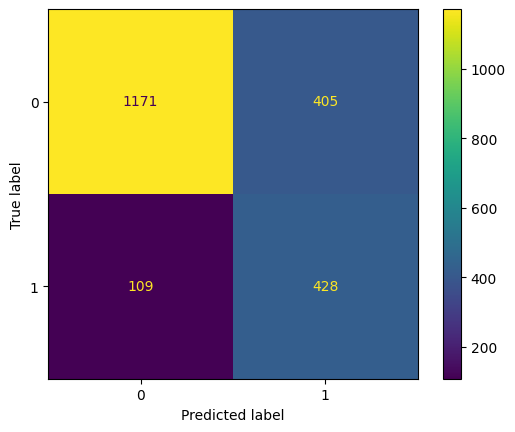

In [ ]:

rf=RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
ad=AdaBoostClassifier()

lg=lgb.LGBMClassifier(learning_rate= 0.1,n_estimators=50,num_leaves=20)
lr=LogisticRegression()
gb=GradientBoostingClassifier(learning_rate=0.05,max_depth= 5,n_estimators=150)
xgb=XGBClassifier(colsample_bytree=0.8,learning_rate= 0.1,max_depth=7,n_estimators=100,subsample=0.8)
svc=SVC()
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lst1=[ad,dt,gb,rf,lr,svc,xgb,lg,nn]
ac_o=[]
model_o=[]
for j in lst1:
  print('*'*20,j,'*'*20)
  j.fit(X_train_o,y_train_o)
  y_pred=j.predict(X_test)

  print(classification_report(y_test,y_pred))
  print(j,ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*200)
  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)

  ac_o.append(accuracy)
  # ac_o.append(j.accuracy_score(y_test,y_pred))
  # model_o.append(j)

In [ ]:
#RandomOverSampler
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X, y)


rf=RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
ad=AdaBoostClassifier()

lg=lgb.LGBMClassifier(learning_rate= 0.1,n_estimators=50,num_leaves=20)
lr=LogisticRegression()
gb=GradientBoostingClassifier(learning_rate=0.05,max_depth= 5,n_estimators=150)
xgb=XGBClassifier(colsample_bytree=0.8,learning_rate= 0.1,max_depth=7,n_estimators=100,subsample=0.8)
svc=SVC()
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lst1=[ad,dt,gb,rf,lr,svc,xgb,lg,nn]
ac_ro=[]
model_ro=[]
for j in lst1:
  print('*'*20,j,'*'*20)
  j.fit(X_train_resampled,y_train_resampled)
  y_pred=j.predict(X_test)

  print(classification_report(y_test,y_pred))
  #print(j,ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*200)
  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)

  ac_ro.append(accuracy)
  model_ro.append(j)

******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1576
           1       0.00      0.00      0.00       537

    accuracy                           0.75      2113
   macro avg       0.37      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.97      0.31      0.47      1576
           1       0.32      0.97      0.49       537

    accuracy                           0.48      2113
   macro avg       0.65      0.64      0.48      2113
weighted avg      

**over_sampling** **with** **PCA**   - it's accuracy is very low

**UNDER_SAMPILNG**  -  gives comparatively less accuracy than over sampling.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
ra=RandomUnderSampler(random_state=1)
X_train_u, y_train_u=ra.fit_resample(X_train,y_train)

In [ ]:

rf=RandomForestClassifier(n_estimators=500,n_jobs=-1,max_depth=9,oob_score=True,random_state=25,max_samples=0.25,min_samples_leaf=3)
ad=AdaBoostClassifier()

lg=lgb.LGBMClassifier()
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=150)
svc=SVC(C=0.1,gamma=0.01,kernel='linear',random_state=2)
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lst1=[ad,dt,gb,rf,lr,svc,xgb,lg,nn]
acus=[]
modelus=[]
for k in lst1:
  print('*'*20,k,'*'*20)
  k.fit(X_train_u,y_train_u)
  y_pred=k.predict(X_test)

  print(classification_report(y_test,y_pred))
  print("_"*200)
  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)

  acus.append(accuracy)

  modelus.append(k)


******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1576
           1       0.55      0.75      0.63       537

    accuracy                           0.78      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.78      0.79      2113

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1576
           1       0.50      0.77      0.60       537

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg      

**pca** **under** **sampling**

In [ ]:
#pca under sampling
pca=PCA(n_components=3,random_state=3)
X_trainm=pca.fit_transform(X_train)
X_testm=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.21219839, 0.13569808, 0.08801288])

In [ ]:

rf=RandomForestClassifier(n_estimators=500,n_jobs=-1,max_depth=9,oob_score=True,random_state=25,max_samples=0.25,min_samples_leaf=3)
ad=AdaBoostClassifier()

lg=lgb.LGBMClassifier(learning_rate= 0.1,n_estimators=50,num_leaves=20)
lr=LogisticRegression()
#gb=GradientBoostingClassifier()
xgb=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=150)
svc=SVC(C=0.1,gamma=0.01,kernel='linear',random_state=2)
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lst1=[ad,dt,gb,rf,lr,svc,xgb,lg,nn]
acup=[]
modelup=[]
for up in lst1:
  print('*'*20,up,'*'*20)
  up.fit(X_trainm,y_train)
  y_pred=up.predict(X_testm)

  print(classification_report(y_test,y_pred))
  print("_"*200)
  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)

  acup.append(accuracy)

  modelup.append(up)


******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1576
           1       0.47      0.71      0.57       537

    accuracy                           0.73      2113
   macro avg       0.68      0.72      0.68      2113
weighted avg       0.78      0.73      0.74      2113

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1576
           1       0.45      0.77      0.57       537

    accuracy                           0.70      2113
   macro avg       0.67      0.73      0.67      2113
weighted avg      

In [ ]:
print("*"*20,"stacking method","*"*20)
lst2=[("knn",KNeighborsClassifier()),("nb",GaussianNB()),("ad",AdaBoostClassifier()),("dt",DecisionTreeClassifier()),("gb",GradientBoostingClassifier()),("rf",RandomForestClassifier()),("lr",RandomForestClassifier()),("svc",SVC(),("ad",AdaBoostClassifier()))]
stc=StackingClassifier(estimators=lst2,final_estimator=RandomForestClassifier())
stc.fit(X_train,y_train)
y_pred_stc=stc.predict(X_test)
print(classification_report(y_test,y_pred_stc))
ac_s=[]
model_s=[]
correct_predictions = (y_pred_stc == y_test).sum()
accuracy_stc = correct_predictions / len(y_test)
print("_"*200)

ac_s.append(accuracy_stc)
model_s.append(stc)
print(ac_s)

******************** stacking method ********************
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1576
           1       0.60      0.57      0.58       537

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113

________________________________________________________________________________________________________________________________________________________________________________________________________
[0.7941315664931378]


In [ ]:
from imblearn.combine import SMOTEENN
ou=SMOTEENN(random_state=1)
X_train_ou,y_train_ou=ou.fit_resample (X_train,y_train)
rf=RandomForestClassifier(n_estimators=500,n_jobs=-1,max_depth=9,oob_score=True,random_state=25,max_samples=0.25,min_samples_leaf=3)
ad=AdaBoostClassifier()

lg=lgb.LGBMClassifier(learning_rate= 0.1,n_estimators=50,num_leaves=20)
lr=LogisticRegression()
gb=GradientBoostingClassifier()
xgb=XGBClassifier(learning_rate=0.01,max_depth=4,n_estimators=150)
svc=SVC(C=0.1,gamma=0.01,kernel='linear',random_state=2)
dt=DecisionTreeClassifier(criterion="entropy",max_depth= 5,min_samples_leaf=4,min_samples_split=2)
nn = MLPClassifier(activation='tanh',hidden_layer_sizes= (100,),learning_rate="constant",solver="sgd")
lst1=[ad,dt,gb,rf,lr,svc,xgb,lg,nn]
acou=[]
modelou=[]
for up in lst1:
  print('*'*20,up,'*'*20)
  up.fit(X_train_ou,y_train_ou)
  y_pred=up.predict(X_test)

  print(classification_report(y_test,y_pred))
  print("_"*200)
  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)

  acou.append(accuracy)

  modelou.append(ou)

******************** AdaBoostClassifier() ********************
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1576
           1       0.49      0.82      0.62       537

    accuracy                           0.74      2113
   macro avg       0.71      0.77      0.71      2113
weighted avg       0.81      0.74      0.76      2113

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4) ********************
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1576
           1       0.48      0.81      0.60       537

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg      

In [ ]:
print("Highest accuracy in each method :-")
highAC_in_up=0.0
for m in acup:
    if m>highAC_in_up:
      highAC_in_up=m

highAC_in_ou=0.0
for m in acou:
    if m>highAC_in_ou:
      highAC_in_ou=m

highAC_in_normal=0.0
for m in ac:
    if m>highAC_in_normal:
      highAC_in_normal=m


highAC_in_us=0.0
for m in acus:
    if m>highAC_in_us:
      highAC_in_us=m


highAC_in_ro=0.0
for m in ac_ro:
    if m>highAC_in_ro:
      highAC_in_ro=m


highAC_in_o=0.0
for m in ac_o:
    if m>highAC_in_o:
      highAC_in_o=m


highAC_in_acp=0.0
for m in acp:
    if m>highAC_in_acp:
      highAC_in_acp=m


accuracy_stc
highAC_lst=pd.DataFrame({"undersampling_pca":highAC_in_up,"SMOTEENN":highAC_in_ou,"RandomOverSampling":highAC_in_ro,"normal":highAC_in_normal,"undersampling":highAC_in_us,"smote":highAC_in_o,"pca":highAC_in_acp,"stacking--":accuracy_stc}, index=[0])
print(highAC_lst)


Highest accuracy in each method :-
   undersampling_pca  SMOTEENN  RandomOverSampling    normal  undersampling  \
0           0.729295  0.752958            0.769049  0.816848       0.795078   

      smote      pca  stacking--  
0  0.798391  0.78372    0.794132  


 A consolidated table was created to compare the accuracy of different algorithms and preprocessing techniques. The table was styled to highlight the highest accuracy value using red color and a gradient color map.

In [ ]:
accuracy_SMOTEENN = pd.Series(acou, name='accuracy')
algorithm_SMOTEENN = pd.Series(modelou, name='algorithm')
normal = pd.concat([accuracy_SMOTEENN, algorithm_SMOTEENN], axis=1)

accuracy_normal = pd.Series(ac, name='accuracy')
algorithm_normal = pd.Series(model, name='algorithm')
normal = pd.concat([accuracy_normal, algorithm_normal], axis=1)

accuracy_RandomOverSampler = pd.Series(ac_ro, name='accuracy')
algorithm_RandomOverSampler = pd.Series(model_ro, name='algorithm')
RandomOverSampler = pd.concat([accuracy_RandomOverSampler, algorithm_RandomOverSampler], axis=1)

accuracy_pca = pd.Series(acp, name='accuracy')
algorithm_pca = pd.Series(modelp, name='algorithm')
pca = pd.concat([accuracy_pca, algorithm_pca], axis=1)


accuracy_under_sampling_pca = pd.Series(acup, name='accuracy')
algorithm_under_sampling_pca = pd.Series(modelup, name='algorithm')
under_sampling_pca = pd.concat([accuracy_under_sampling_pca,algorithm_under_sampling_pca], axis=1)

accuracy_over_smote = pd.Series(ac_o, name='accuracy')
algorithm_smote = pd.Series(model_o, name='algorithm')
smote = pd.concat([accuracy_over_smote, algorithm_smote], axis=1)

accuracy_under_sampling = pd.Series(acus, name='accuracy')
algorithm_under_sampling = pd.Series(modelus, name='algorithm')
under_sampling = pd.concat([accuracy_under_sampling, algorithm_under_sampling], axis=1)


aggregate_df=pd.concat([normal,pca,RandomOverSampler,under_sampling_pca,smote,under_sampling])
aggregate_df = aggregate_df.reset_index(drop=True)   #becouse of difference in index number order highlight_max() did not work so i droped index


aggregate_df_styled = aggregate_df.style.highlight_max(subset=['accuracy'], color="red")
aggregate_df_styled = aggregate_df_styled.background_gradient(subset=['accuracy'], cmap='RdYlGn', vmax=1.0, vmin=0.0)



print(" accuracy obtained through stacking",accuracy_stc)

aggregate_df_styled


 accuracy obtained through stacking 0.7941315664931378


,accuracy,algorithm
0,0.814009,AdaBoostClassifier()
1,0.789399,"DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)"
2,0.816848,GradientBoostingClassifier()
3,0.802177,RandomForestClassifier()
4,0.809749,LogisticRegression()
5,0.807856,"SVC(C=0.1, gamma=0.01, kernel='linear', random_state=2)"
6,0.797444,"XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, gpu_id=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=None, num_parallel_tree=None, predictor=None, random_state=None, ...)"
7,0.812589,"LGBMClassifier(n_estimators=50, num_leaves=20)"
8,0.804543,"MLPClassifier(activation='tanh', solver='sgd')"
9,0.774255,"DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4)"


Conclusion:
The Telco Customer Churn prediction project utilized various classification algorithms and preprocessing techniques to predict customer churn. The results demonstrate the effectiveness of different algorithms and provide insights into the potential relationships between variables. By leveraging machine learning techniques, telco companies can better understand customer churn patterns and take proactive measures to retain customers.